<a href="https://colab.research.google.com/github/KARTIKEYgarg1/50days-ml/blob/main/panTamper.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from skimage.metrics import structural_similarity
import imutils
import cv2
from PIL import Image
import requests

In [ ]:
!mkdir pan
!mkdir pan/image

In [ ]:
original=Image.open(requests.get("https://upload.wikimedia.org/wikipedia/commons/3/31/A_sample_of_Permanent_Account_Number_%28PAN%29_Card.jpg",stream=True).raw)
# tampered=Image.open(requests.get("https://5.imimg.com/data5/VC/JQ/SU/ANDROID-33737889/product-jpeg-500x500.jpeg",stream=True).raw)
tampered=Image.open("pan/image/samplePsn.png")
# original.size
original.format

'JPEG'

In [ ]:
original=original.resize((250,150))
original.save("pan/image/original.png")
tampered=tampered.resize((250,150))
tampered.save("pan/image/tampered.png")

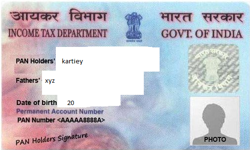

In [ ]:
# original
tampered

In [ ]:
original=cv2.imread("pan/image/original.png")
tampered=cv2.imread("pan/image/tampered.png")

In [ ]:
original_g=cv2.cvtColor(original,cv2.COLOR_BGR2GRAY)
tampered_g=cv2.cvtColor(tampered,cv2.COLOR_BGR2GRAY)

In [ ]:
(score,diff)=structural_similarity(original_g,tampered_g,full=True)
diff=(diff*255).astype("uint8")
score

0.5671614565162221

In [ ]:
thresh=cv2.threshold(diff,0,255,cv2.THRESH_BINARY_INV|cv2.THRESH_OTSU)[1]
cnts=cv2.findContours(thresh.copy(),cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
cnts=imutils.grab_contours(cnts)

In [ ]:
for c in cnts:
  (x,y,w,h)=cv2.boundingRect(c)
  cv2.rectangle(original,(x,y),(x+w,y+h),(0,0,255),2)
  cv2.rectangle(tampered,(x,y),(x+w,y+h),(0,0,255),2)

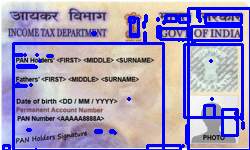

In [ ]:
Image.fromarray(original)

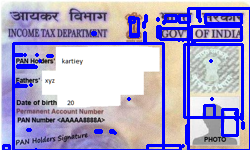

In [ ]:
Image.fromarray(tampered)

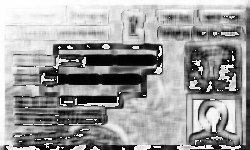

In [ ]:
Image.fromarray(diff)#black portion shows difference in images

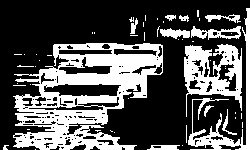

In [ ]:
Image.fromarray(thresh)#black portion shows difference in images

In [ ]:
if score>0.5:
  print("VALID")
else:
  print("NOT VALID")

VALID
